# Supervised Learning in R: Classification

# DATACAMP

In [2]:
options(warn=-1)

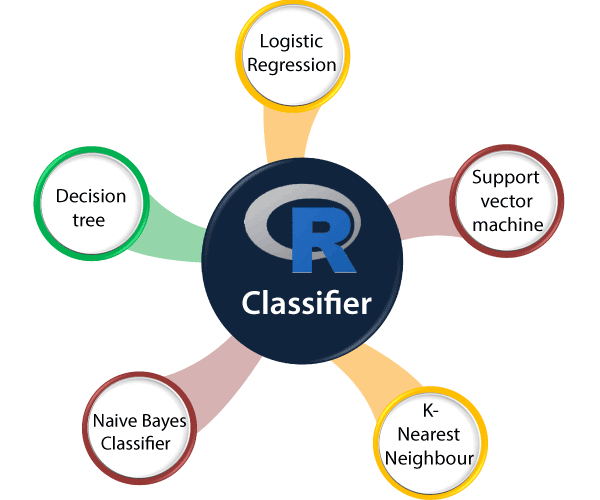

In [3]:
library("IRdisplay")
display_png(file="r-classification.png") 

# Course Description
This beginner-level introduction to machine learning covers four of the most common classification algorithms. You will come away with a basic understanding of how each algorithm approaches a learning task, as well as learn the R functions needed to apply these tools to your own work.

In [7]:
# install.packages("xlsx")
# install.packages("data.table")

In [9]:
library(ggplot2)
library(dplyr)
library(data.table)
library(xlsx)

# Chapter 1: k-Nearest Neighbors (kNN)

As the kNN algorithm literally "learns by example" it is a case in point for starting to understand supervised machine learning. This chapter will introduce classification while working through the application of kNN to self-driving vehicle road sign recognition.

In [10]:
# Recognizing a road sign with kNN
# 
# After several trips with a human behind the wheel, it is time for the self-driving car to attempt the test course alone.
# 
# As it begins to drive away, its camera captures the following image:

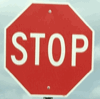

In [11]:
display_png(file="1.1 Recognizing a road sign with kNN.png") 

In [12]:
# Can you apply a kNN classifier to help the car recognize this sign?
# 
# The dataset signs is loaded in your workspace along with the dataframe next_sign, 
# which holds the observation you want to classify.
# 
# Instructions
# 
# Load the class package.
# Create a vector of sign labels to use with kNN by extracting the column sign_type from signs.
# Identify the next_sign using the knn() function.
# Set the train argument equal to the signs data frame without the first column.
# Set the test argument equal to the data frame next_sign.
# Use the vector of labels you created as the cl argument.

In [13]:
#library(data.table)
#url <- "https://assets.datacamp.com/production/repositories/718/datasets/c274ea22cc3d7e12d7bb9fdc9c2bdabe9ab025f4/knn_traffic_signs.csv"
#df <- fread(url)

In [14]:
signs <- read.xlsx(file ="df.xlsx", sheetIndex = 1, header=TRUE)
next_sign <- read.xlsx(file ="df.xlsx", sheetIndex = 2, header=TRUE)

In [16]:
# install.packages("class")

In [17]:
# Load the 'class' package
library(class)

# Create a vector of labels
sign_types <- signs$sign_type

# Classify the next sign observed
knn(train = signs[-1], test = next_sign, cl = sign_types)

[1] stop
Levels: pedestrian speed stop

In [18]:
# Exploring the traffic sign dataset
# 
# To better understand how the knn() function was able to classify the stop sign, 
# it may help to examine the training dataset it used.
# 
# Each previously observed street sign was divided into a 4x4 grid, and the red, green, 
# and blue level for each of the 16 center pixels is recorded as illustrated here.

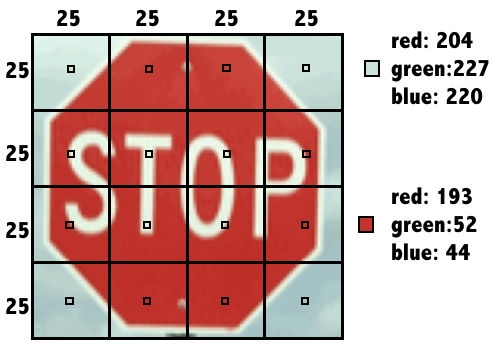

In [19]:
display_png(file="1.2 Exploring the traffic sign dataset.png") 

In [20]:
# The result is a dataset that records the sign_type as well as 16 x 3 = 48 color properties of each sign.
# 
# Instructions
# 
# Use the str() function to examine the signs dataset.
# Use table() to count the number of observations of each sign type by passing it the column containing the labels.
# Run the provided aggregate() command to see whether the average red level might vary by sign type.

In [21]:
# Examine the structure of the signs dataset
str(signs)

# Count the number of signs of each type
table(signs$sign_type)

# Check r10's average red level by sign type
aggregate(r10 ~ sign_type, data = signs, mean)

'data.frame':	146 obs. of  49 variables:
 $ sign_type: Factor w/ 3 levels "pedestrian","speed",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ r1       : num  155 142 57 22 169 75 136 149 13 123 ...
 $ g1       : num  228 217 54 35 179 67 149 225 34 124 ...
 $ b1       : num  251 242 50 41 170 60 157 241 28 107 ...
 $ r2       : num  135 166 187 171 231 131 200 34 5 83 ...
 $ g2       : num  188 204 201 178 254 89 203 45 21 61 ...
 $ b2       : num  101 44 68 26 27 53 107 1 11 26 ...
 $ r3       : num  156 142 51 19 97 214 150 155 123 116 ...
 $ g3       : num  227 217 51 27 107 144 167 226 154 124 ...
 $ b3       : num  245 242 45 29 99 75 134 238 140 115 ...
 $ r4       : num  145 147 59 19 123 156 171 147 21 67 ...
 $ g4       : num  211 219 62 27 147 169 218 222 46 67 ...
 $ b4       : num  228 242 65 29 152 190 252 242 41 52 ...
 $ r5       : num  166 164 156 42 221 67 171 170 36 70 ...
 $ g5       : num  233 228 171 37 236 50 158 191 60 53 ...
 $ b5       : num  245 229 50 3 117 36 108 113 26 26 


pedestrian      speed       stop 
        46         49         51 

sign_type,r10
<fct>,<dbl>
pedestrian,113.71739
speed,80.63265
stop,132.39216


In [22]:
# Classifying a collection of road signs
# 
# Now that the autonomous vehicle has successfully stopped on its own, 
# your team feels confident allowing the car to continue the test course.
# 
# The test course includes 59 additional road signs divided into three types:

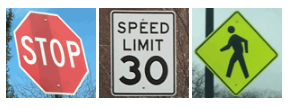

In [23]:
display_png(file="1.3 Classifying a collection of road signs.png")

In [24]:
# At the conclusion of the trial, you are asked to measure the car's overall performance at recognizing these signs.
# 
# The class package and the dataset signs are already loaded in your workspace. 
# So is the dataframe test_signs, which holds a set of observations you'll test your model on.
# 
# Instructions
# 
# Classify the test_signs data using knn().
# Set train equal to the observations in signs without labels.
# Use test_signs for the test argument, again without labels.
# For the cl argument, use the vector of labels provided for you.
# Use table() to explore the classifier's performance at identifying the three sign types (the confusion matrix).
# Create the vector signs_actual by extracting the labels from test_signs.
# Pass the vector of predictions and the vector of actual signs to table() to cross tabulate them.
# Compute the overall accuracy of the kNN learner using the mean() function.

In [25]:
test_signs <- read.xlsx(file ="df.xlsx", sheetIndex = 3, header=TRUE)

In [26]:
# Use kNN to identify the test road signs
sign_types <- signs$sign_type
signs_pred <- knn(train = signs[-1], test = test_signs[-1], cl = sign_types)

# Create a confusion matrix of the predicted versus actual values
signs_actual <- test_signs$sign_type
table(signs_pred, signs_actual)

# Compute the accuracy
mean(signs_pred == signs_actual)

            signs_actual
signs_pred   pedestrian speed stop
  pedestrian         19     2    0
  speed               0    17    0
  stop                0     2   19

[1] 0.9322034

In [27]:
# Testing other 'k' values
# 
# By default, the knn() function in the class package uses only the single nearest neighbor.
# 
# Setting a k parameter allows the algorithm to consider additional nearby neighbors. 
# This enlarges the collection of neighbors which will vote on the predicted class.
# 
# Compare k values of 1, 7, and 15 to examine the impact on traffic sign classification accuracy.
# 
# The class package is already loaded in your workspace along with the datasets signs, 
# signs_test, and sign_types. The object signs_actual holds the true values of the signs.
# 
# Instructions
# 
# Compute the accuracy of the default k = 1 model using the given code, 
# then find the accuracy of the model using mean() to compare signs_actual and the model's predictions.
# Modify the knn() function call by setting k = 7 and again find accuracy value.
# Revise the code once more by setting k = 15, plus find the accuracy value one more time.

In [28]:
signs_actual <-c("pedestrian",
"pedestrian",
"pedestrian",
"pedestrian",
"pedestrian",
"pedestrian",
"pedestrian",
"pedestrian",
"pedestrian",
"pedestrian",
"pedestrian",
"pedestrian",
"pedestrian",
"pedestrian",
"pedestrian",
"pedestrian",
"pedestrian",
"pedestrian",
"pedestrian",
"speed",
"speed",
"speed",
"speed",
"speed",
"speed",
"speed",
"speed",
"speed",
"speed",
"speed",
"speed",
"speed",
"speed",
"speed",
"speed",
"speed",
"speed",
"speed",
"speed",
"speed",
"stop",
"stop",
"stop",
"stop",
"stop",
"stop",
"stop",
"stop",
"stop",
"stop",
"stop",
"stop",
"stop",
"stop",
"stop",
"stop",
"stop",
"stop",
"stop")

In [29]:
signs_test <- read.xlsx(file ="df.xlsx", sheetIndex = 3, header=TRUE)

In [30]:
# Compute the accuracy of the baseline model (default k = 1)
k_1 <- knn(train = signs[-1], test = signs_test[-1], cl = sign_types)
mean(signs_actual == k_1)

# Modify the above to set k = 7
k_7 <- knn(train = signs[-1], test = signs_test[-1], cl = sign_types, k = 7)
mean(signs_actual == k_7)

# Set k = 15 and compare to the above
k_15 <- knn(train = signs[-1], test = signs_test[-1], cl = sign_types, k = 15)
mean(signs_actual == k_15)

[1] 0.9322034

[1] 0.9661017

[1] 0.8813559

In [31]:
# Seeing how the neighbors voted
# 
# When multiple nearest neighbors hold a vote, it can sometimes be useful to examine 
# whether the voters were unanimous or widely separated.
# 
# For example, knowing more about the voters' confidence in the classification could allow 
# an autonomous vehicle to use caution in the case there is any chance at all that a stop sign is ahead.
# 
# In this exercise, you will learn how to obtain the voting results from the knn() function.
# 
# The class package has already been loaded in your workspace along with the datasets signs, 
# sign_types, and signs_test.
# 
# Instructions
# 
# Build a kNN model with the prob = TRUE parameter to compute the vote proportions. Set k = 7.
# Use the attr() function to obtain the vote proportions for the predicted class. 
# These are stored in the attribute "prob".
# Examine the first several vote outcomes and percentages using the head() function 
# to see how the confidence varies from sign to sign.

In [32]:
# Use the prob parameter to get the proportion of votes for the winning class
sign_pred <- knn(train = signs[-1], test = signs_test[-1], cl = sign_types, k = 7, prob = TRUE)

# Get the "prob" attribute from the predicted classes
sign_prob <- attr(sign_pred, "prob")

# Examine the first several predictions
head(sign_pred)

# Examine the proportion of votes for the winning class
head(sign_prob)

[1] pedestrian pedestrian pedestrian stop       pedestrian pedestrian
Levels: pedestrian speed stop

[1] 0.5714286 0.5714286 0.8571429 0.5714286 0.8571429 0.5714286

# Chapter 2: Naive Bayes

Naive Bayes uses principles from the field of statistics to make predictions. This chapter will introduce the basics of Bayesian methods while exploring how to apply these techniques to iPhone-like destination suggestions.

In [33]:
# Computing probabilities
# 
# The where9am data frame contains 91 days (thirteen weeks) worth of data in which 
# Brett recorded his location at 9am each day as well as whether the daytype was a weekend or weekday.
# 
# Using the conditional probability formula below, you can compute the probability 
# that Brett is working in the office, given that it is a weekday.

$$ P(A|B) = \frac{P(A \text{ and } B)}{P(B)} $$

In [34]:
# Calculations like these are the basis of the Naive Bayes 
# destination prediction model you'll develop in later exercises.
# 
# Instructions
# 
# Find P(office) using nrow() and subset() to count rows in the dataset and save the result as p_A.
# Find P(weekday), using nrow() and subset() again, and save the result as p_B.
# Use nrow() and subset() a final time to find P(office and weekday). Save the result as p_AB.
# Compute P(office | weekday) and save the result as p_A_given_B.
# Print the value of p_A_given_B.

In [35]:
where9am <- read.xlsx(file ="df.xlsx", sheetIndex = 4, header=TRUE)

In [36]:
# Compute P(A) 
p_A <- nrow(subset(where9am, location == "office")) / nrow(where9am)

# Compute P(B)
p_B <- nrow(subset(where9am, daytype == "weekday")) / nrow(where9am)

# Compute the observed P(A and B)
p_AB <- nrow(subset(where9am, location == "office" & daytype == "weekday")) / nrow(where9am)

# Compute P(A | B) and print its value
p_A_given_B <- p_AB / p_B
p_A_given_B

[1] 0.6

In [37]:
# A simple Naive Bayes location model
# 
# The previous exercises showed that the probability that Brett is at work 
# or at home at 9am is highly dependent on whether it is the weekend or a weekday.
# 
# To see this finding in action, use the where9am data frame to build a Naive Bayes model on the same data.
# 
# You can then use this model to predict the future: where does the model think that Brett 
# will be at 9am on Thursday and at 9am on Saturday?
# 
# The dataframe where9am is available in your workspace. 
# This dataset contains information about Brett's location at 9am on different days.
# 
# Instructions
# 
# Load the naivebayes package.
# Use naive_bayes() with a formula like y ~ x to build a model of location as a function of daytype.
# Forecast the Thursday 9am location using predict() with the thursday9am object as the newdata argument.
# Do the same for predicting the saturday9am location.

In [38]:
# where9am <- read.xlsx(file ="df.xlsx", sheetIndex = 4, header=TRUE)
# thursday9am <- read.xlsx(file ="df.xlsx", sheetIndex = 5, header=TRUE)
# saturday9am <- read.xlsx(file ="df.xlsx", sheetIndex = 6, header=TRUE)

In [39]:
# where9am$daytype <- toString(where9am$daytype)
# where9am$location<- toString(where9am$location)
# thursday9am$daytype <- toString(thursday9am$daytype)
# saturday9am$daytype <- toString(saturday9am$daytype)

In [40]:
# class(where9am$daytype)
# class(where9am$location)
# class(thursday9am$daytype)
# class(saturday9am$daytype)

In [42]:
# install.packages("naivebayes")
# install.packages("e1071")

In [43]:
library(e1071)

In [44]:
#  # Load the naivebayes package
#  library(naivebayes)
#  
#  # Build the location prediction model
#  locmodel <- naive_bayes(location ~ daytype, data = where9am)
#  
#  # Predict Thursday's 9am location
#  predict(locmodel, thursday9am)
#  
#  # Predict Saturdays's 9am location
#  predict(locmodel, saturday9am)

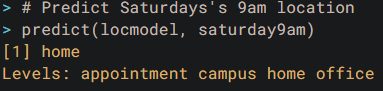

In [45]:
display_png(file="naives.png")

In [46]:
# Examining "raw" probabilities
# 
# The naivebayes package offers several ways to peek inside a Naive Bayes model.
# 
# Typing the name of the model object provides the a priori (overall) and conditional probabilities 
# of each of the model's predictors. If one were so inclined, you might use these 
# for calculating posterior (predicted) probabilities by hand.
# 
# Alternatively, R will compute the posterior probabilities for you if the type = "prob" 
# parameter is supplied to the predict() function.
# 
# Using these methods, examine how the model's predicted 9am location probability varies from day-to-day. 
# The model locmodel that you fit in the previous exercise is in your workspace.
# 
# Instructions
# 
# Print the locmodel object to the console to view the computed a priori and conditional probabilities.
# Use the predict() function similarly to the previous exercise, but with type = "prob" 
# to see the predicted probabilities for Thursday at 9am.
# Compare these to the predicted probabilities for Saturday at 9am.

In [47]:
#  # The 'naivebayes' package is loaded into the workspace
#  # and the Naive Bayes 'locmodel' has been built
#  
#  # Examine the location prediction model
#  locmodel
#  
#  # Obtain the predicted probabilities for Thursday at 9am
#  predict(locmodel, thursday9am, type = "prob")
#  
#  # Obtain the predicted probabilities for Saturday at 9am
#  predict(locmodel, saturday9am, type = "prob")

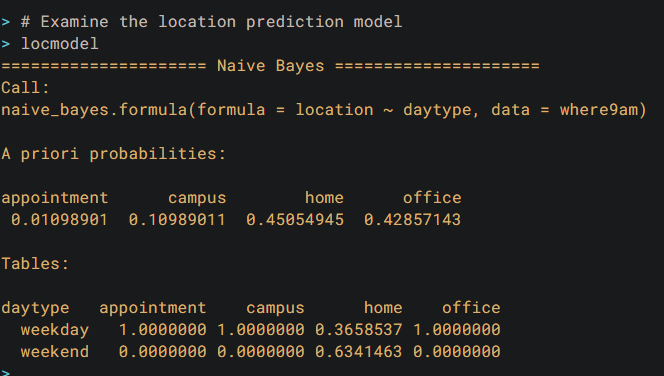

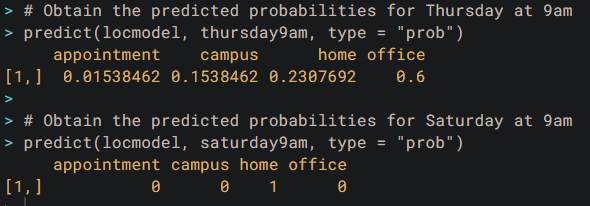

In [48]:
display_png(file="nb1.png")
display_png(file="nb2.png")

In [49]:
# A more sophisticated location model
# 
# The locations dataset records Brett's location every hour for 13 weeks. 
# Each hour, the tracking information includes the daytype (weekend or weekday) 
# as well as the hourtype (morning, afternoon, evening, or night).
# 
# Using this data, build a more sophisticated model to see how Brett's predicted location 
# not only varies by the day of week but also by the time of day. The dataset locations is already loaded in your workspace.
# 
# You can specify additional independent variables in your formula using the + sign (e.g. y ~ x + b).
# 
# Instructions
# 
# Use the R formula interface to build a model where location depends on both daytype and hourtype. 
# Recall that the function naive_bayes() takes 2 arguments: formula and data.
# Predict Brett's location on a weekday afternoon using the dataframe weekday_afternoon and the predict() function.
# Do the same for a weekday_evening.

In [50]:
#  # The 'naivebayes' package is loaded into the workspace already
#  
#  # Build a NB model of location
#  locmodel <- naive_bayes(location ~ daytype + hourtype, data = locations)
#  
#  # Predict Brett's location on a weekday afternoon
#  predict(locmodel, weekday_afternoon)
#  
#  # Predict Brett's location on a weekday evening
#  predict(locmodel, weekday_evening)

In [51]:
# locations <- read.xlsx(file ="df.xlsx", sheetIndex = 7, header=TRUE)
# weekday_afternoon <- read.xlsx(file ="df.xlsx", sheetIndex = 8, header=TRUE)
# weekday_evening <- read.xlsx(file ="df.xlsx", sheetIndex = 9, header=TRUE)

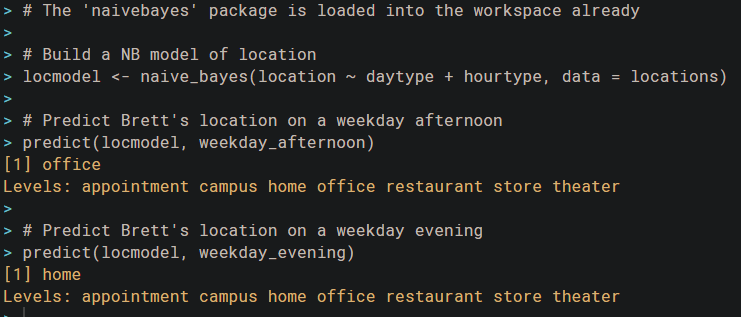

In [52]:
display_png(file="nb3.png")

In [53]:
# Preparing for unforeseen circumstances
# 
# While Brett was tracking his location over 13 weeks, he never went into the office during the weekend. 
# Consequently, the joint probability of P(office and weekend) = 0.
# 
# Explore how this impacts the predicted probability that Brett may go to work on the weekend in the future. 
# Additionally, you can see how using the Laplace correction will allow a small chance 
# for these types of unforeseen circumstances.
# 
# The model locmodel is already in your workspace, along with the dataframe weekend_afternoon.
# 
# Instructions
# 
# Use the locmodel to output predicted probabilities for a weekend afternoon by using the predict() function. 
# Remember to set the type argument.
# Create a new naive Bayes model with the Laplace smoothing parameter set to 1. 
# You can do this by setting the laplace argument in your call to naive_bayes(). Save this as locmodel2.
# See how the new predicted probabilities compare by using the predict() function on your new model.

In [54]:
#  # The 'naivebayes' package is loaded into the workspace already
#  # The Naive Bayes location model (locmodel) has already been built
#  
#  # Observe the predicted probabilities for a weekend afternoon
#  predict(locmodel, weekend_afternoon, type = "prob")
#  
#  # Build a new model using the Laplace correction
#  locmodel2 <- naive_bayes(location ~ daytype + hourtype, data = locations, laplace = 1)
#  
#  # Observe the new predicted probabilities for a weekend afternoon
#  predict(locmodel2, weekend_afternoon, type = "prob")

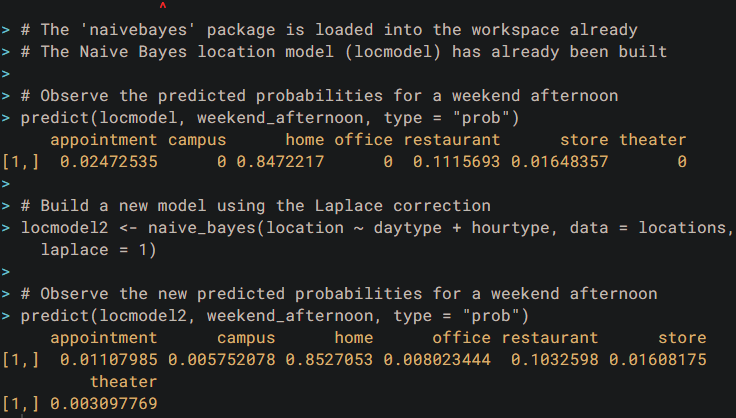

In [55]:
display_png(file="nb4.png")

# Chapter 3: Logistic Regression

Logistic regression involves fitting a curve to numeric data to make predictions about binary events. Arguably one of the most widely used machine learning methods, this chapter will provide an overview of the technique while illustrating how to apply it to fundraising data.

In [56]:
# Building simple logistic regression models
# 
# The donors dataset contains 93,462 examples of people mailed in 
# a fundraising solicitation for paralyzed military veterans. 
# The donated column is 1 if the person made a donation in response to the mailing and 0 otherwise. 
# This binary outcome will be the dependent variable for the logistic regression model.
# 
# The remaining columns are features of the prospective donors that may influence their donation behavior. 
# These are the model's independent variables.
# 
# When building a regression model, it is often helpful to form a hypothesis about 
# which independent variables will be predictive of the dependent variable. 
# The bad_address column, which is set to 1 for an invalid mailing address and 0 otherwise, 
# seems like it might reduce the chances of a donation. Similarly, one might suspect that 
# religious interest (interest_religion) and interest in veterans affairs (interest_veterans) 
# would be associated with greater charitable giving.
# 
# In this exercise, you will use these three factors to create a simple model of donation behavior. 
# The dataset donors is available in your workspace.
# 
# Instructions
# 
# Examine donors using the str() function.
# Count the number of occurrences of each level of the donated variable using the table() function.
# Fit a logistic regression model using the formula interface and the three independent variables described above.
# Call glm() with the formula as its first argument and the dataframe as the data argument.
# Save the result as donation_model.
# Summarize the model object with summary().

In [57]:
library(data.table)

In [58]:
url <- "https://assets.datacamp.com/production/repositories/718/datasets/9055dac929e4515286728a2a5dae9f25f0e4eff6/donors.csv"
donors <- fread(url)

In [59]:
# Examine the dataset to identify potential independent variables

str(donors)
# Explore the dependent variable
table(donors$donated)

# Build the donation model
donation_model <- glm(donated~bad_address+interest_religion+interest_veterans, 
                      data = donors, family = "binomial")

# Summarize the model results
summary(donation_model)

Classes 'data.table' and 'data.frame':	93462 obs. of  13 variables:
 $ donated          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ veteran          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ bad_address      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ age              : int  60 46 NA 70 78 NA 38 NA NA 65 ...
 $ has_children     : int  0 1 0 0 1 0 1 0 0 0 ...
 $ wealth_rating    : int  0 3 1 2 1 0 2 3 1 0 ...
 $ interest_veterans: int  0 0 0 0 0 0 0 0 0 0 ...
 $ interest_religion: int  0 0 0 0 1 0 0 0 0 0 ...
 $ pet_owner        : int  0 0 0 0 0 0 1 0 0 0 ...
 $ catalog_shopper  : int  0 0 0 0 1 0 0 0 0 0 ...
 $ recency          : chr  "CURRENT" "CURRENT" "CURRENT" "CURRENT" ...
 $ frequency        : chr  "FREQUENT" "FREQUENT" "FREQUENT" "FREQUENT" ...
 $ money            : chr  "MEDIUM" "HIGH" "MEDIUM" "MEDIUM" ...
 - attr(*, ".internal.selfref")=<externalptr> 



    0     1 
88751  4711 


Call:
glm(formula = donated ~ bad_address + interest_religion + interest_veterans, 
    family = "binomial", data = donors)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.3480  -0.3192  -0.3192  -0.3192   2.5678  

Coefficients:
                  Estimate Std. Error  z value Pr(>|z|)    
(Intercept)       -2.95139    0.01652 -178.664   <2e-16 ***
bad_address       -0.30780    0.14348   -2.145   0.0319 *  
interest_religion  0.06724    0.05069    1.327   0.1847    
interest_veterans  0.11009    0.04676    2.354   0.0186 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 37330  on 93461  degrees of freedom
Residual deviance: 37316  on 93458  degrees of freedom
AIC: 37324

Number of Fisher Scoring iterations: 5


In [60]:
# Making a binary prediction
# 
# In the previous exercise, you used the glm() function to build a logistic regression model of donor behavior. 
# As with many of R's machine learning methods, you can apply the predict() function to the model object 
# to forecast future behavior. By default, predict() outputs predictions in terms of 
# log odds unless type = "response" is specified. This converts the log odds to probabilities.
# 
# Because a logistic regression model estimates the probability of the outcome, 
# it is up to you to determine the threshold at which the probability implies action. 
# One must balance the extremes of being too cautious versus being too aggressive. 
# For example, if you were to solicit only the people with a 99% or greater donation probability, 
# you may miss out on many people with lower estimated probabilities that still choose to donate. 
# This balance is particularly important to consider for severely imbalanced outcomes, 
# such as in this dataset where donations are relatively rare.
# 
# The dataset donors and the model donation_model are already loaded in your workspace.
# 
# Instructions
# 
# Use the predict() function to estimate each person's donation probability. 
# Use the type argument to get probabilities. Assign the predictions to a new column called donation_prob.
# Find the actual probability that an average person would donate by passing the mean() function 
# the appropriate column of the donors dataframe.
# Use ifelse() to predict a donation if their predicted donation probability is greater than average. 
# Assign the predictions to a new column called donation_pred.
# Use the mean() function to calculate the model's accuracy.

In [61]:
# Estimate the donation probability
donors$donation_prob <- predict(donation_model, type = "response")

# Find the donation probability of the average prospect
mean(donors$donated)

# Predict a donation if probability of donation is greater than average
donors$donation_pred <- ifelse(donors$donation_prob > 0.0504, 1, 0)

# Calculate the model's accuracy
mean(donors$donated == donors$donation_pred)

[1] 0.05040551

[1] 0.794815

In [62]:
# Calculating ROC Curves and AUC
# 
# The previous exercises have demonstrated that accuracy is a very misleading measure 
# of model performance on imbalanced datasets. Graphing the model's performance better illustrates 
# the tradeoff between a model that is overly agressive and one that is overly passive.
# 
# In this exercise you will create a ROC curve and compute the area under the curve (AUC) 
# to evaluate the logistic regression model of donations you built earlier.
# 
# The dataset donors with the column of predicted probabilities, donation_prob ,is already loaded in your workspace.
# 
# Instructions
# 
# Load the pROC package.
# Create a ROC curve with roc() and the columns of actual and predicted donations. Store the result as ROC.
# Use plot() to draw the ROC object. Specify col = "blue" to color the curve blue.
# Compute the area under the curve with auc().

In [64]:
# install.packages('pROC')

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.5102

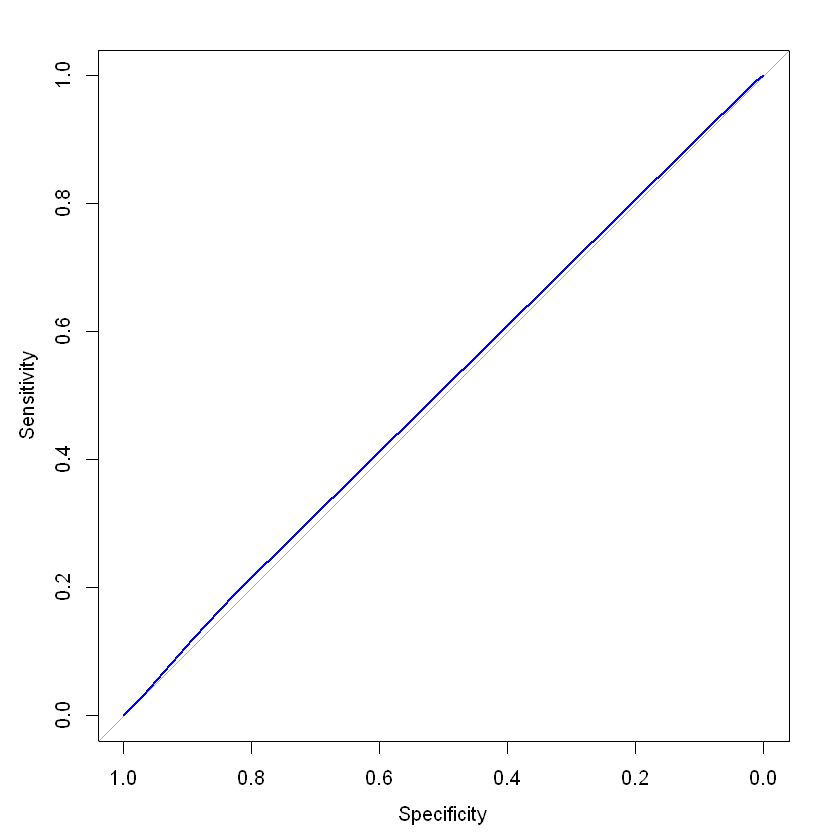

In [67]:
# Load the pROC package
library(pROC)

# Create a ROC curve
ROC <- roc(donors$donated, donors$donation_prob)

# Plot the ROC curve
plot(ROC, col = "blue")

# Calculate the area under the curve (AUC)
auc(ROC)

In [68]:
# Coding categorical features
# 
# Sometimes a dataset contains numeric values that represent a categorical feature.
# 
# In the donors dataset, wealth_rating uses numbers to indicate the donor's wealth level:
# 
# 0 = Unknown
# 1 = Low
# 2 = Medium
# 3 = High
# This exercise illustrates how to prepare this type of categorical feature and examines 
# its impact on a logistic regression model. The dataframe donors is loaded in your workspace.
# 
# Instructions
# 
# Create a factor wealth_levels from the numeric wealth_rating with labels 
# as shown above by passing the factor() function the column you want to convert, the individual levels, and the labels.
# Use relevel() to change the reference category to Medium. The first argument should be your new factor column.
# Build a logistic regression model using the column wealth_levels to predict 
# donated and display the result with summary().

In [69]:
# Convert the wealth rating to a factor
donors$wealth_levels <- factor(donors$wealth_rating, levels = c(0, 1, 2, 3), labels = c("Unknown", "Low", "Medium", "High"))

# Use relevel() to change reference category
donors$wealth_levels <- relevel(donors$wealth_levels, ref = "Medium")

# See how our factor coding impacts the model
summary(glm(donated ~ wealth_levels, data = donors, family = "binomial"))


Call:
glm(formula = donated ~ wealth_levels, family = "binomial", data = donors)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.3320  -0.3243  -0.3175  -0.3175   2.4582  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)          -2.91894    0.03614 -80.772   <2e-16 ***
wealth_levelsUnknown -0.04373    0.04243  -1.031    0.303    
wealth_levelsLow     -0.05245    0.05332  -0.984    0.325    
wealth_levelsHigh     0.04804    0.04768   1.008    0.314    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 37330  on 93461  degrees of freedom
Residual deviance: 37323  on 93458  degrees of freedom
AIC: 37331

Number of Fisher Scoring iterations: 5


In [70]:
# Handling missing data
# 
# Some of the prospective donors have missing age data. 
# Unfortunately, R will exclude any cases with NA values when building a regression model.
# 
# One workaround is to replace, or impute, the missing values with an estimated value. 
# After doing so, you may also create a missing data indicator to model 
# the possibility that cases with missing data are different in some way from those without.
# 
# The dataframe donors is loaded in your workspace.
# 
# Instructions
# 
# Use summary() on donors$age to find the average age of prospects with non-missing data.
# Use ifelse() and the test is.na(donors$age) to impute the average (rounded to 2 decimal places) 
# for cases with missing age. Be sure to also ignore NAs.
# Create a binary dummy variable named missing_age indicating the presence of missing data using 
# another ifelse() call and the same test.

In [71]:
# Find the average age among non-missing values
summary(donors$age)

# Impute missing age values with the mean age
donors$imputed_age <- ifelse(is.na(donors$age), round(mean(donors$age, na.rm = TRUE), 2), donors$age)

# Create missing value indicator for age
donors$missing_age <- ifelse(is.na(donors$age), 1, 0)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   1.00   48.00   62.00   61.65   75.00   98.00   22546 

In [72]:
# Building a more sophisticated model
# One of the best predictors of future giving is a history of recent, frequent, and large gifts. 
# In marketing terms, this is known as R/F/M:
# 
# Recency
# Frequency
# Money
# Donors that haven't given both recently and frequently may be especially likely to give again; 
# in other words, the combined impact of recency and frequency may be greater than the sum of the separate effects.
# 
# Because these predictors together have a greater impact on the dependent variable, 
# their joint effect must be modeled as an interaction. The donors dataset has been loaded for you.
# 
# Instructions
# 
# Create a logistic regression model of donated as a function of money plus 
# the interaction of recency and frequency. Use * to add the interaction term.
# Examine the model's summary() to confirm the interaction effect was added.
# Save the model's predicted probabilities as rfm_prob. Use the predict() function, 
# and remember to set the type argument.
# Plot a ROC curve by using the function roc(). Remember, this function takes 
# the column of outcomes and the vector of predictions.
# Compute the AUC for the new model with the function auc() and compare performance to the simpler model.


Call:
glm(formula = donated ~ recency * frequency + money, family = "binomial", 
    data = donors)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.3696  -0.3696  -0.2895  -0.2895   2.7924  

Coefficients:
                                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)                       -3.01142    0.04279 -70.375   <2e-16 ***
recencyLAPSED                     -0.86677    0.41434  -2.092   0.0364 *  
frequencyINFREQUENT               -0.50148    0.03107 -16.143   <2e-16 ***
moneyMEDIUM                        0.36186    0.04300   8.415   <2e-16 ***
recencyLAPSED:frequencyINFREQUENT  1.01787    0.51713   1.968   0.0490 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 37330  on 93461  degrees of freedom
Residual deviance: 36938  on 93457  degrees of freedom
AIC: 36948

Number of Fisher Scoring iterations: 6


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.5785

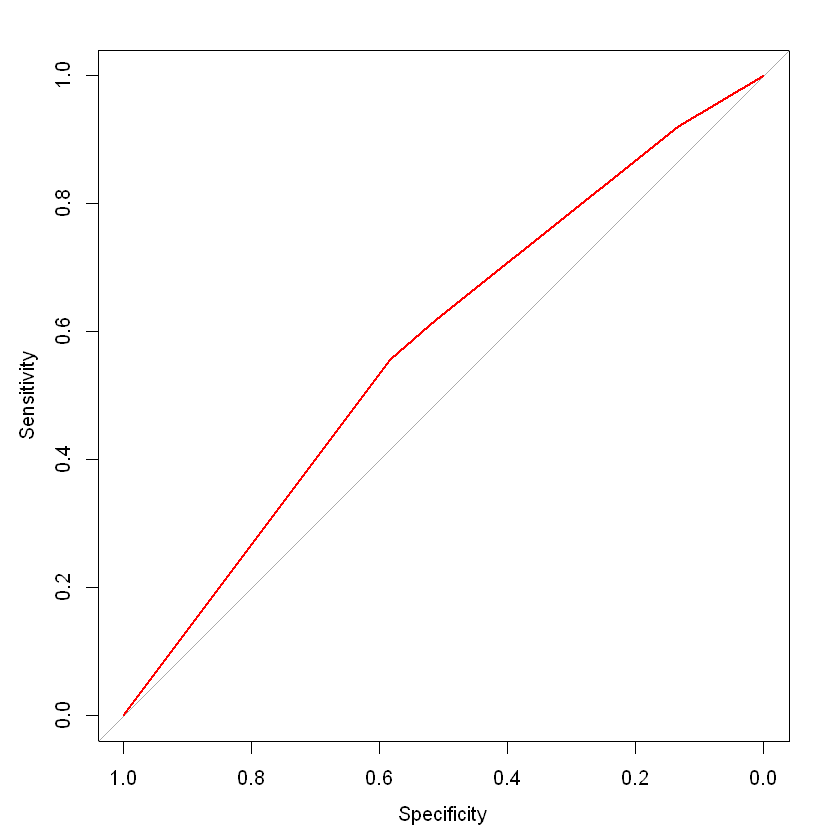

In [75]:
# Build a recency, frequency, and money (RFM) model
rfm_model <- glm(donated ~ recency * frequency + money, data = donors, family = "binomial")

# Summarize the RFM model to see how the parameters were coded
summary(rfm_model)

# Compute predicted probabilities for the RFM model
rfm_prob <- predict(rfm_model, data = donors, type = "response")

# Plot the ROC curve for the new model
library(pROC)
ROC <- roc(donors$donated, rfm_prob)
plot(ROC, col = "red")
auc(ROC)

In [76]:
# Building a stepwise regression model
# 
# In the absence of subject-matter expertise, stepwise regression can assist with the search 
# for the most important predictors of the outcome of interest.
# 
# In this exercise, you will use a forward stepwise approach to add predictors 
# to the model one-by-one until no additional benefit is seen. The donors dataset has been loaded for you.
# 
# Instructions
# 
# Use the R formula interface with glm() to specify the base model with no predictors. 
# Set the explanatory variable equal to 1.
# Use the R formula interface again with glm() to specify the model with all predictors.
# Apply step() to these models to perform forward stepwise regression. 
# Set the first argument to null_model and set direction = "forward". 
# This might take a while (up to 10 or 15 seconds) as your computer has to fit quite 
# a few different models to perform stepwise selection.
# Create a vector of predicted probabilities using the predict() function.
# Plot the ROC curve with roc() and plot() and compute the AUC of the stepwise model with auc().

Start:  AIC=37332.13
donated ~ 1

                    Df Deviance   AIC
+ frequency          1    28502 37122
+ money              1    28621 37241
+ wealth_rating      1    28705 37326
+ has_children       1    28705 37326
+ age                1    28707 37328
+ imputed_age        1    28707 37328
+ wealth_levels      3    28704 37328
+ interest_veterans  1    28709 37330
+ donation_prob      1    28710 37330
+ donation_pred      1    28710 37330
+ catalog_shopper    1    28710 37330
+ pet_owner          1    28711 37331
<none>                    28714 37332
+ interest_religion  1    28712 37333
+ recency            1    28713 37333
+ bad_address        1    28714 37334
+ veteran            1    28714 37334

Step:  AIC=37024.77
donated ~ frequency

                    Df Deviance   AIC
+ money              1    28441 36966
+ wealth_rating      1    28493 37018
+ wealth_levels      3    28490 37019
+ has_children       1    28494 37019
+ donation_prob      1    28498 37023
+ interest_v

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.5849

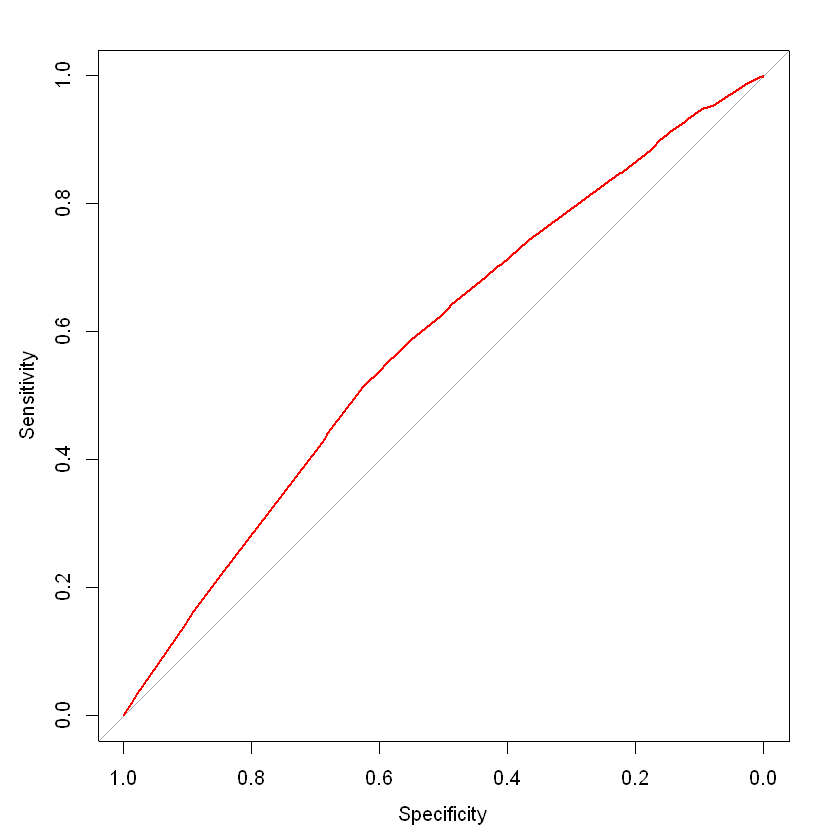

In [77]:
# Specify a null model with no predictors
null_model <- glm(donated ~ 1, data = donors, family = "binomial")

# Specify the full model using all of the potential predictors
full_model <- glm(donated ~ ., data = donors, family = "binomial")

# Use a forward stepwise algorithm to build a parsimonious model
step_model <- step(null_model, scope = list(lower = null_model, upper = full_model), direction = "forward")

# Estimate the stepwise donation probability
step_prob <- predict(step_model, type = "response")

# Plot the ROC of the stepwise model
library(pROC)
ROC <- roc(donors$donated, step_prob)
plot(ROC, col = "red")
auc(ROC)

# Chapter 4: Classification Trees

Classification trees use flowchart-like structures to make decisions. Because humans can readily understand these tree structures, classification trees are useful when transparency is needed, such as in loan approval. We'll use the Lending Club dataset to simulate this scenario.

In [78]:
# Building a simple decision tree
# 
# The loans dataset contains 11,312 randomly-selected people who applied for and 
# later received loans from Lending Club, a US-based peer-to-peer lending company.
# 
# You will use a decision tree to try to learn patterns in the outcome of these loans 
# (either repaid or default) based on the requested loan amount and credit score at the time of application.
# 
# Then, see how the tree's predictions differ for an applicant with good credit versus one with bad credit.
# 
# The dataset loans is already in your workspace.
# 
# Instructions
# 
# Load the rpart package.
# Fit a decision tree model with the function rpart().
# Supply the R formula that specifies outcome as a function of loan_amount and credit_score as the first argument.
# Leave the control argument alone for now. (You'll learn more about that later!)
# Use predict() with the resulting loan model to predict the outcome for the good_credit applicant. 
# Use the type argument to predict the "class" of the outcome.
# Do the same for the bad_credit applicant.

In [80]:
# install.packages('rpart')

In [81]:
loans <- read.xlsx(file ="df.xlsx", sheetIndex = 10, header=TRUE)

In [82]:
good_credit <- read.xlsx(file ="df.xlsx", sheetIndex = 11, header=TRUE)
bad_credit <- read.xlsx(file ="df.xlsx", sheetIndex = 12, header=TRUE)                       

In [84]:
# Load the rpart package
library(rpart)

# Build a lending model predicting loan outcome versus loan amount and credit score
loan_model <- rpart(outcome ~ loan_amount + credit_score, data = loans, method = "class", control = rpart.control(cp = 0))

# Make a prediction for someone with good credit
predict(loan_model, good_credit, type = "class")

# Make a prediction for someone with bad credit
predict(loan_model, bad_credit, type = "class")

1 
repaid 
Levels: default repaid

1 
repaid 
Levels: default repaid

In [85]:
# Visualizing classification trees
# 
# Due to government rules to prevent illegal discrimination, 
# lenders are required to explain why a loan application was rejected.
# 
# The structure of classification trees can be depicted visually, 
# which helps to understand how the tree makes its decisions. 
# The model loan_model that you fit in the last exercise is in your workspace.
# 
# Instructions
# 
# Type loan_model to see a text representation of the classification tree.
# Load the rpart.plot package.
# Apply the rpart.plot() function to the loan model to visualize the tree.
# See how changing other plotting parameters impacts the visualization by running the supplied command.

In [87]:
# install.packages('rpart.plot')

In [88]:
# Examine the loan_model object
loan_model



n= 11312 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

  1) root 11312 5654 repaid (0.4998232 0.5001768)  
    2) loan_amount=0          LOW,0         HIGH,00        HIGH,00      MEDIUM,01         LOW,01        HIGH,02         LOW,02        HIGH,02      MEDIUM,03        HIGH,04        HIGH,05        HIGH,06         LOW,06        HIGH,07         LOW,07        HIGH,08        HIGH,1          LOW,1         HIGH,10        HIGH,11        HIGH,13        HIGH,14         LOW,15         LOW,15        HIGH,16      MEDIUM,17         LOW,18        HIGH,19         LOW,19        HIGH,2          LOW,2         HIGH,20         LOW,20        HIGH,21         LOW,21        HIGH,22         LOW,22        HIGH,22      MEDIUM,23      MEDIUM,24         LOW,24        HIGH,25         LOW,27         LOW,28        HIGH,28      MEDIUM,3         HIGH,30        HIGH,31        HIGH,32         LOW,32      MEDIUM,33         LOW,33        HIGH,34         LOW,34        HIGH,34      MEDIUM,35        

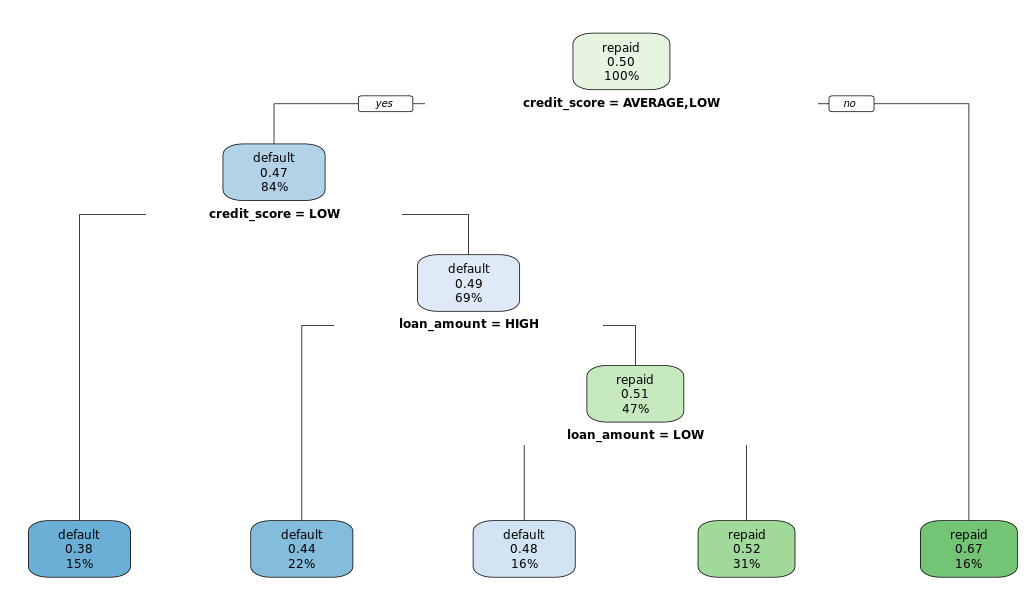

In [89]:
# Load the rpart.plot package
library(rpart.plot)

# Plot the loan_model with default settings
# rpart.plot(loan_model)
display_png(file="tree1.png") 

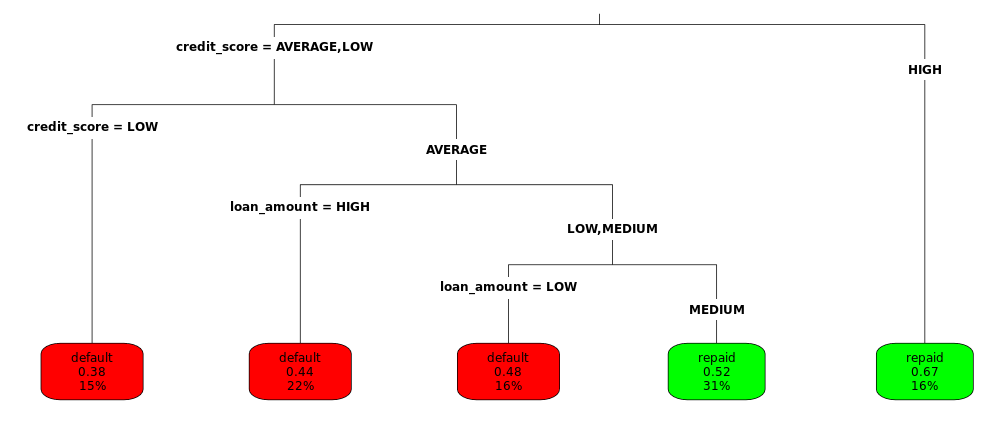

In [90]:
# Plot the loan_model with customized settings
#rpart.plot(loan_model, type = 3, box.palette = c("red", "green"), fallen.leaves = TRUE)
display_png(file="tree2.png") 

In [91]:
# Creating random test datasets
# 
# Before building a more sophisticated lending model, it is important to hold out a portion 
# of the loan data to simulate how well it will predict the outcomes of future loan applicants.
# 
# As depicted in the following image, you can use 75% of the observations for training and 25% for testing the model.

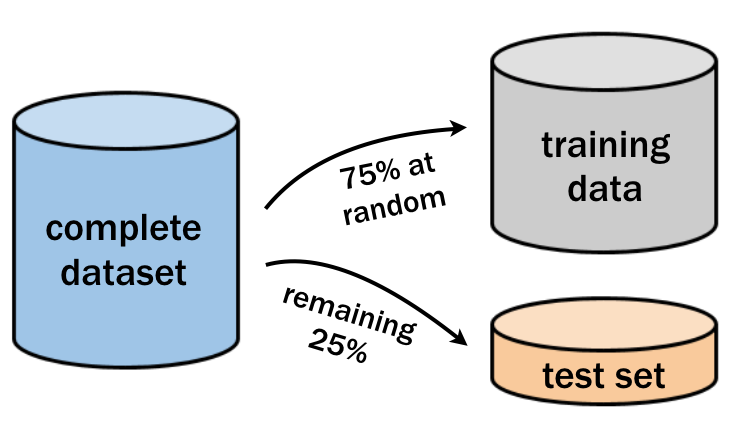

In [92]:
display_png(file="dtree_test_set.png") 

In [93]:
# The sample() function can be used to generate a random sample of rows to include in the training set. 
# Simply supply it the total number of observations and the number needed for training.
# 
# Use the resulting vector of row IDs to subset the loans into training and testing datasets. 
# The dataset loans is loaded in your workspace.
# 
# Instructions
# 
# Apply the nrow() function to determine how many observations are in the loans dataset, 
# and the number needed for a 75% sample.
# Use the sample() function to create an integer vector of row IDs for the 75% sample. 
# The first argument of sample() should be the number of rows in the data set, 
# and the second is the number of rows you need in your training set.
# Subset the loans data using the row IDs to create the training dataset. Save this as loans_train.
# Subset loans again, but this time select all the rows that are not in sample_rows. Save this as loans_test

In [94]:
# Determine the number of rows for training
nrow(loans) * 0.75

# Create a random sample of row IDs
sample_rows <- sample(nrow(loans), nrow(loans) * 0.75)

# Create the training dataset
loans_train <- loans[sample_rows, ]

# Create the test dataset
loans_test <- loans[-sample_rows, ]

[1] 8484

In [95]:
# Building and evaluating a larger tree
# 
# Previously, you created a simple decision tree that used the applicant's credit score 
# and requested loan amount to predict the loan outcome.
# 
# Lending Club has additional information about the applicants, such as home ownership status, 
# length of employment, loan purpose, and past bankruptcies, that may be useful for making more accurate predictions.
# 
# Using all of the available applicant data, build a more sophisticated lending model using 
# the random training dataset created previously. Then, use this model to make predictions on 
# the testing dataset to estimate the performance of the model on future loan applications.
# 
# The rpart package is loaded into the workspace and the loans_train and loans_test datasets have been created.
# 
# Instructions
# 
# Use rpart() to build a loan model using the training dataset and all of the available predictors. 
# Again, leave the control argument alone.
# Applying the predict() function to the testing dataset, create a vector of predicted outcomes. 
# Don't forget the type argument.
# Create a table() to compare the predicted values to the actual outcome values.
# Compute the accuracy of the predictions using the mean() function.

In [97]:
# Grow a tree using all of the available applicant data
loan_model <- rpart(outcome ~ ., data = loans_train, method = "class", control = rpart.control(cp = 0))

# Make predictions on the test dataset
loans_test$pred <- predict(loan_model, loans_test, type = "class")

# Examine the confusion matrix
table(loans_test$pred, loans_test$outcome)

# Compute the accuracy on the test dataset
mean(loans_test$pred == loans_test$outcome)

         
          default repaid
  default     770    690
  repaid      659    709

[1] 0.5229844

In [98]:
# Preventing overgrown trees
# 
# The tree grown on the full set of applicant data grew to be extremely large and extremely complex, 
# with hundreds of splits and leaf nodes containing only a handful of applicants. 
# This tree would be almost impossible for a loan officer to interpret.
# 
# Using the pre-pruning methods for early stopping, you can prevent a tree from growing too large and complex. 
# See how the rpart control options for maximum tree depth and minimum split count impact the resulting tree.
# 
# rpart is loaded.
# 
# Instructions 1/2
# 1
# Use rpart() to build a loan model using the training dataset and all of the available predictors.
# Set the model controls using rpart.control() with parameters cp set to 0 and maxdepth set to 6.
# See how the test set accuracy of the simpler model compares to the original accuracy of 58.3%.
# First create a vector of predictions using the predict() function.
# Compare the predictions to the actual outcomes and use mean() to calculate the accuracy.

In [99]:
# Grow a tree with maxdepth of 6
loan_model <- rpart(outcome ~ ., data = loans_train, method = "class", control = rpart.control(cp = 0, maxdepth = 6))

# Make a class prediction on the test set
loans_test$pred <- predict(loan_model, loans_test, type = "class")

# Compute the accuracy of the simpler tree
mean(loans_test$pred == loans_test$outcome)

[1] 0.5261669

In [100]:
# Creating a nicely pruned tree
# 
# Stopping a tree from growing all the way can lead it to ignore some aspects of the data 
# or miss important trends it may have discovered later.
# 
# By using post-pruning, you can intentionally grow a large and complex tree then 
# prune it to be smaller and more efficient later on.
# 
# In this exercise, you will have the opportunity to construct a visualization of 
# the tree's performance versus complexity, and use this information to prune the tree to an appropriate level.
# 
# The rpart package is loaded into the workspace, along with loans_test and loans_train.
# 
# Instructions
# 
# Use all of the applicant variables and no pre-pruning to create an overly complex tree. 
# Make sure to set cp = 0 in rpart.control() to prevent pre-pruning.
# Create a complexity plot by using plotcp() on the model.
# Based on the complexity plot, prune the tree to a complexity of 0.0014 using the prune() function 
# with the tree and the complexity parameter.
# Compare the accuracy of the pruned tree to the original accuracy of 58.3%. 
# To calculate the accuracy use the predict() and mean() functions.

[1] 0.5342999

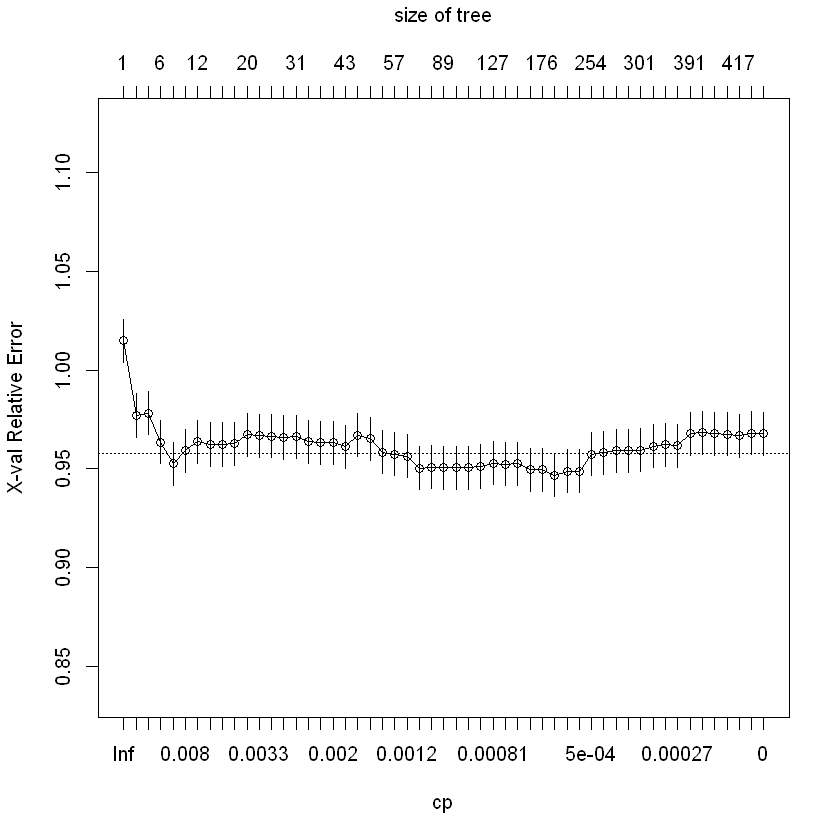

In [102]:
# Grow an overly complex tree
loan_model <- rpart(outcome ~ ., data = loans_train, method = "class", control = rpart.control(cp = 0))

# Examine the complexity plot
plotcp(loan_model)

# Prune the tree
loan_model_pruned <- prune(loan_model, cp = 0.0014)

# Compute the accuracy of the pruned tree
loans_test$pred <- predict(loan_model_pruned, loans_test, type = "class")
mean(loans_test$pred == loans_test$outcome)

In [103]:
# Building a random forest model
# 
# In spite of the fact that a forest can contain hundreds of trees, 
# growing a decision tree forest is perhaps even easier than creating a single highly-tuned tree.
# 
# Using the randomForest package, build a random forest and see how it compares to the single trees you built previously.
# 
# Keep in mind that due to the random nature of the forest, 
# the results may vary slightly each time you create the forest.
# 
# Instructions
# 
# Load the randomForest package.
# Build a random forest model using all of the loan application variables. 
# The randomForest function also uses the formula interface.
# Compute the accuracy of the random forest model to compare to 
# the original tree's accuracy of 58.3% using predict() and mean().

In [105]:
# install.packages('randomForest')

In [107]:
# Load the randomForest package
library(randomForest)

# Build a random forest model
loan_model <- randomForest(outcome ~ ., data = loans_train)

# Compute the accuracy of the random forest
loans_test$pred <- predict(loan_model, loans_test)
mean(loans_test$pred == loans_test$outcome)

ERROR: Error in randomForest.default(m, y, ...): Can not handle categorical predictors with more than 53 categories.


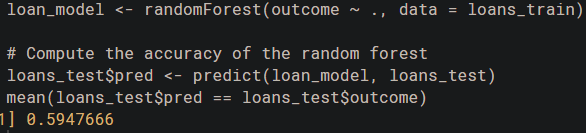

In [108]:
display_png(file="rf1.png") 

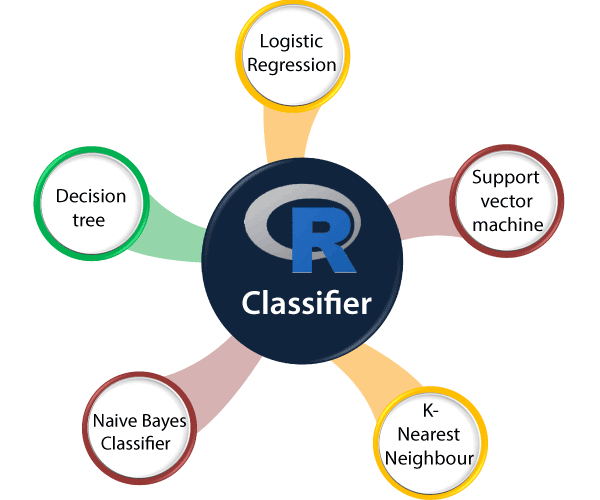

In [109]:
display_png(file="r-classification.png") 

# END OF THIS EXCELLENTE COURSE